In [1]:
import pandas as pd


In [2]:
file = pd.read_csv(r"C:\Users\c nest\Documents\adult.csv")

In [3]:
print(file)

       age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishin

In [4]:
# find rows and columns
file.shape

(48842, 15)

In [5]:
# What are the data types of each column (numeric, categorical, object)?
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
print(file.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


In [7]:
# How many unique values exist in each categorical column?
file.select_dtypes(include='object').nunique()

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
gender             2
native-country    42
income             2
dtype: int64

In [8]:
# What is the distribution of the target variable income (<=50K vs >50K)?
file['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [9]:
# What are the summary statistics (mean, median, std, min, max, quartiles) of numerical columns like age, fnlwgt, educational-num, hours-per-week, capital-gain, capital-loss?

cols = ['age', 'fnlwgt', 'hours-per-week', 'capital-gain', 'capital-loss']

# Get standard summary stats (includes count, mean, std, min, 25%, 50%, 75%, max)
file[cols].describe()

,age,fnlwgt,hours-per-week,capital-gain,capital-loss
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,40.422382,1079.067626,87.502314
std,13.710510,1.056040e+05,12.391444,7452.019058,403.004552
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000
25%,28.000000,1.175505e+05,40.000000,0.000000,0.000000
50%,37.000000,1.781445e+05,40.000000,0.000000,0.000000
75%,48.000000,2.376420e+05,45.000000,0.000000,0.000000
max,90.000000,1.490400e+06,99.000000,99999.000000,4356.000000


<Axes: >

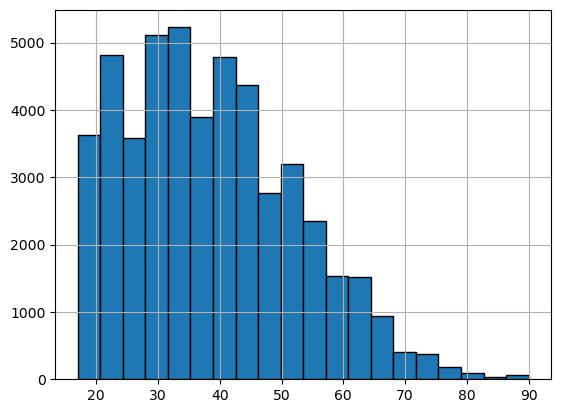

In [10]:
# What is the age distribution of individuals?
file['age'].value_counts().sort_index()
# for a visual distribution (histogram):

file['age'].hist(bins=20, edgecolor='black')

In [11]:
# What is the distribution of hours-per-week? Are there extreme values (like people working 0 or 100 hours)?
file['hours-per-week'].value_counts().sort_index()

hours-per-week
1      27
2      53
3      59
4      84
5      95
     ... 
95      2
96      9
97      2
98     14
99    137
Name: count, Length: 96, dtype: int64

In [12]:
# Are there extreme values (like people working 0 or 100 hours)
file[file['hours-per-week'] == 0]
file[file['hours-per-week'] >= 100]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [13]:
file["hours-per-week"].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [14]:
# Which individuals have the highest capital-gain and capital-loss?
file[file["capital-gain"] == file["capital-gain"].max()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
346,39,Private,198654,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,165001,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,159219,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,191547,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48109,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48371,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
48519,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [15]:
# Individual(s) with highest capital-loss
file[file['capital-loss'] == file['capital-loss'].max()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
25244,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
31037,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
47062,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


In [16]:
# Is fnlwgt column meaningful for prediction, or just a sampling weight?



In [18]:
# What are the unique values and their counts in workclass?

file['workclass'].unique()
file['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [19]:
# How is education distributed? Which education levels are most common?
# Get the distribution of education levels
education_distribution = file['education'].value_counts()

# Display the distribution
print(education_distribution)

# Optionally, show percentages
education_percentage = file['education'].value_counts(normalize=True) * 100
print(education_percentage)


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64
education
HS-grad         32.316449
Some-college    22.271815
Bachelors       16.430531
Masters          5.439990
Assoc-voc        4.219729
11th             3.709922
Assoc-acdm       3.277917
10th             2.843864
7th-8th          1.955284
Prof-school      1.707547
9th              1.547848
12th             1.345154
Doctorate        1.216166
5th-6th          1.042136
1st-4th          0.505712
Preschool        0.169936
Name: proportion, dtype: float64


In [21]:
# Does educational-num map properly to education categories (e.g., HS-grad → 9)?
# Check for inconsistencies between education and education-num
edu_map_check = file[['education']].drop_duplicates().sort_values(by='education')
print(edu_map_check)


        education
5            10th
0            11th
173          12th
323       1st-4th
37        5th-6th
9         7th-8th
54            9th
2      Assoc-acdm
41      Assoc-voc
11      Bachelors
19      Doctorate
1         HS-grad
15        Masters
779     Preschool
7     Prof-school
3    Some-college


In [22]:
# What are the common occupations (occupation) and how are they distributed?
# Get the count of each unique occupation
occupation_counts = file['occupation'].value_counts()

# Display the counts
print(occupation_counts)

# Optionally, show percentage distribution
occupation_percentages = file['occupation'].value_counts(normalize=True) * 100
print(occupation_percentages)


occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64
occupation
Prof-specialty       12.636665
Craft-repair         12.513820
Exec-managerial      12.460587
Adm-clerical         11.488064
Sales                11.268990
Other-service        10.079440
Machine-op-inspct     6.187298
?                     5.751198
Transport-moving      4.821670
Handlers-cleaners     4.242251
Farming-fishing       3.050653
Tech-support          2.960567
Protective-serv       2.012612
Priv-house-serv       0.495475
Armed-Forces          0.030711
Name: proportion, dtype: float64


In [23]:
# How are marital statuses distributed in marital-status?
# Get the distribution of marital statuses
marital_status_distribution = file['marital-status'].value_counts()

# Display the distribution
print(marital_status_distribution)

# Optionally, show percentages
marital_status_percentage = file['marital-status'].value_counts(normalize=True) * 100
print(marital_status_percentage)


marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64
marital-status
Married-civ-spouse       45.819172
Never-married            32.998239
Divorced                 13.580525
Separated                 3.132550
Widowed                   3.107981
Married-spouse-absent     1.285779
Married-AF-spouse         0.075754
Name: proportion, dtype: float64


In [27]:
# What are the proportions of genders in the dataset?
# Get the count of each gender
gender_counts = file['gender'].value_counts()

# Display the counts
print(gender_counts)




gender
Male      32650
Female    16192
Name: count, dtype: int64


In [29]:
# What is the race distribution in the dataset?
race_counts = file['race'].value_counts()


print(race_counts)



race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64


In [30]:
# Which countries are represented in native-country, and which are most frequent?
# List all unique countries in native-country
unique_countries = file['native-country'].unique()
print("Countries represented:", unique_countries)

# Count frequency of each country
country_counts = file['native-country'].value_counts()

# Display the most frequent countries (top 10)
print("Top 10 most frequent countries:")
print(country_counts.head(10))


Countries represented: ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']
Top 10 most frequent countries:
native-country
United-States    43832
Mexico             951
?                  857
Philippines        295
Germany            206
Puerto-Rico        184
Canada             182
El-Salvador        155
India              151
Cuba               138
Name: count, dtype: int64


income            <=50K       >50K
education                         
10th          93.736501   6.263499
11th          94.922737   5.077263
12th          92.694064   7.305936
1st-4th       96.761134   3.238866
5th-6th       94.695481   5.304519
7th-8th       93.507853   6.492147
9th           94.576720   5.423280
Assoc-acdm    74.203623  25.796377
Assoc-voc     74.672489  25.327511
Bachelors     58.716511  41.283489
Doctorate     27.441077  72.558923
HS-grad       84.142169  15.857831
Masters       45.088446  54.911554
Preschool     98.795181   1.204819
Prof-school   26.019185  73.980815
Some-college  81.035117  18.964883


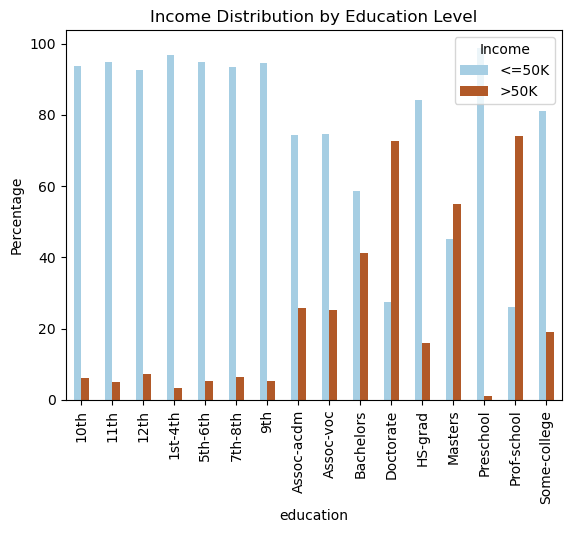

In [34]:
# How does income (<=50K vs >50K) vary with education level?
# Crosstab of education level vs income categories
education_income_distribution = pd.crosstab(file['education'], file['income'], normalize='index') * 100

# Display the percentage distribution of income within each education level
print(education_income_distribution)

# Optional: visualize with a stacked bar chart
import matplotlib.pyplot as plt

education_income_distribution.plot(kind='bar', colormap='Paired')
plt.ylabel('Percentage')
plt.title('Income Distribution by Education Level')
plt.legend(title='Income')
plt.show()


income
<=50K    36.872184
>50K     44.275178
Name: age, dtype: float64


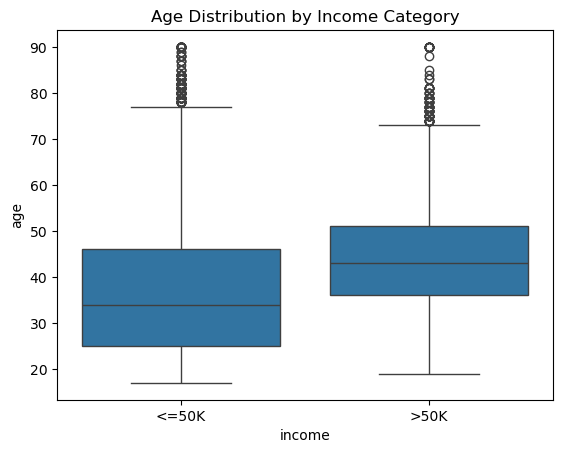

In [36]:
# What is the relationship between age and income category?
# Calculate average age by income category
age_income = file.groupby('income')['age'].mean()
print(age_income)

# Alternatively, show age distribution by income category
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='income', y='age', data=file)
plt.title('Age Distribution by Income Category')
plt.show()
